### на основе https://www.kaggle.com/code/heliarahimi/helia-task3-movie-recommenders

##### Да, я использовал чужой код. Думаю, основной целью данного задания было показать, что я
- могу быстро разобраться в теме (до этого не занимался рекомендательными системами)
- могу понять чужой код
- могу использовать github

In [1]:
import numpy as np 
from numpy import nan
import pandas as pd 
from matplotlib import pyplot as plt

import os
for dirname, _, filenames in os.walk(r'C:\Users\vadim\Downloads\movielens20m'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\vadim\Downloads\movielens20m\genome_scores.csv
C:\Users\vadim\Downloads\movielens20m\genome_tags.csv
C:\Users\vadim\Downloads\movielens20m\link.csv
C:\Users\vadim\Downloads\movielens20m\movie.csv
C:\Users\vadim\Downloads\movielens20m\rating.csv
C:\Users\vadim\Downloads\movielens20m\tag.csv


#### Считаем и посмотрим на данные:

In [2]:
data_movie = pd.read_csv(r'C:\Users\vadim\Downloads\movielens20m\movie.csv')
data_rating = pd.read_csv(r'C:\Users\vadim\Downloads\movielens20m\rating.csv')
data_tag = pd.read_csv(r'C:\Users\vadim\Downloads\movielens20m\tag.csv')

In [3]:
data_movie

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [4]:
data_movie[data_movie.title == 'Titanic (1997)']

,movieId,title,genres
1661,1721,Titanic (1997),Drama|Romance


In [5]:
data_tag

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18
...,...,...,...,...
465559,138446,55999,dragged,2013-01-23 23:29:32
465560,138446,55999,Jason Bateman,2013-01-23 23:29:38
465561,138446,55999,quirky,2013-01-23 23:29:38
465562,138446,55999,sad,2013-01-23 23:29:32


In [6]:
data_rating

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
...,...,...,...,...
20000258,138493,68954,4.5,2009-11-13 15:42:00
20000259,138493,69526,4.5,2009-12-03 18:31:48
20000260,138493,69644,3.0,2009-12-07 18:10:57
20000261,138493,70286,5.0,2009-11-13 15:42:24


In [7]:
data_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB


In [8]:
data_tag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465564 entries, 0 to 465563
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   userId     465564 non-null  int64 
 1   movieId    465564 non-null  int64 
 2   tag        465548 non-null  object
 3   timestamp  465564 non-null  object
dtypes: int64(2), object(2)
memory usage: 14.2+ MB


In [9]:
data_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 610.4+ MB


In [10]:
# добавим названия фильмов в data_rating
data_rating = pd.merge(data_movie[['movieId','title']],data_rating)
data_rating

,movieId,title,userId,rating,timestamp
0,1,Toy Story (1995),3,4.0,1999-12-11 13:36:47
1,1,Toy Story (1995),6,5.0,1997-03-13 17:50:52
2,1,Toy Story (1995),8,4.0,1996-06-05 13:37:51
3,1,Toy Story (1995),10,4.0,1999-11-25 02:44:47
4,1,Toy Story (1995),11,4.5,2009-01-02 01:13:41
...,...,...,...,...,...
20000258,131254,Kein Bund für's Leben (2007),79570,4.0,2015-03-30 19:32:59
20000259,131256,"Feuer, Eis & Dosenbier (2002)",79570,4.0,2015-03-30 19:48:08
20000260,131258,The Pirates (2014),28906,2.5,2015-03-30 19:56:32
20000261,131260,Rentun Ruusu (2001),65409,3.0,2015-03-30 19:57:46


#### Самые популярные фильмы

In [11]:
top_n=10
pop_movies = data_rating.groupby('title').agg({'rating': 'sum'}).nlargest(top_n, 'rating')
pop_movies

,rating
title,
"Shawshank Redemption, The (1994)",281788.0
Pulp Fiction (1994),280967.5
Forrest Gump (1994),266607.0
"Silence of the Lambs, The (1991)",264403.5
Star Wars: Episode IV - A New Hope (1977),228400.0
Jurassic Park (1993),218840.0
Braveheart (1995),217363.0
Schindler's List (1993),215741.5
"Matrix, The (1999)",214945.0


#### Создадим профили объектов (item data) для контентной фильтрации:

In [12]:
# соберем все тэги фильмов и добавим их в новый датасет
df = data_tag.groupby("movieId")['tag'].agg(lambda x: set(x)).reset_index()

In [13]:
# разделим тэги через ", " сохраним их в столбце metadata
df['metadata'] = df['tag'].str.join(", ")

In [14]:
# Объединим data_movie и датасет с тэгами фильмов df
data_item = pd.merge(data_movie,df.drop(columns = 'tag'), how = 'outer')

In [15]:
# у некоторых фильмов нет тэгов, заполним пропуски
data_item['metadata']= data_item['metadata'].fillna('No tag')
data_item

,movieId,title,genres,metadata
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,55 movies every kid should see--Entertainment ...
1,2,Jumanji (1995),Adventure|Children|Fantasy,"game, For children, CLV, board game, time trav..."
2,3,Grumpier Old Men (1995),Comedy|Romance,"comedinha de velhinhos engraÃƒÂ§ada, moldy, gr..."
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"chick flick, characters, CLV, revenge"
4,5,Father of the Bride Part II (1995),Comedy,"remake, Touching, Comedy, CLV, Steve Martin, s..."
...,...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy,No tag
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,No tag
27275,131258,The Pirates (2014),Adventure,"bandits, whale, mutiny, pirates, Korea"
27276,131260,Rentun Ruusu (2001),(no genres listed),No tag


#### Создадим матрицу пользователь-объект

In [16]:
from scipy.sparse import csr_matrix

In [17]:
# в связи с ограниченностью ресурсов (оперативной памяти) сделаем подвыборку рейтингов
sub_rating = data_rating.sample(10000, random_state = 42).reset_index()

In [18]:
data_user_item = sub_rating.pivot(index = 'movieId', columns = 'userId', values = 'rating').fillna(0)
data_user_item

userId,11,21,44,69,90,91,96,142,144,152,...,138301,138328,138355,138388,138404,138406,138426,138437,138464,138474
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Создадим TF-IDF Vectorizer, применим TruncatedSVD

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data_item['metadata'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=data_item.index.tolist())
print(tfidf_df.shape)

(27278, 23851)


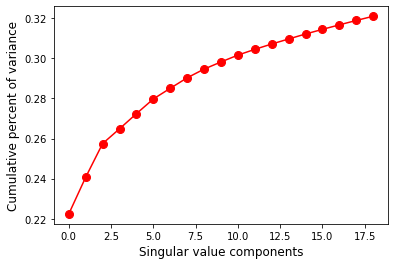

In [23]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=19)
latent_matrix = svd.fit_transform(tfidf_df)

explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms = 16, color='red')
plt.xlabel('Singular value components', fontsize= 12)
plt.ylabel('Cumulative percent of variance', fontsize=12)        
plt.show()

In [24]:
n = 20
latent_matrix_1_df = pd.DataFrame(latent_matrix[:,0:n], index=data_item.title.tolist())

#### Коллаборативная фильтрация

In [25]:
latent_matrix_2 = svd.fit_transform(data_user_item)
latent_matrix_2_df = pd.DataFrame(latent_matrix_2, index= sub_rating.title.unique())

In [26]:
latent_matrix_2_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Charley Varrick (1973),-5.910081e-02,6.432298e-02,6.054192e-03,-2.120139e-01,-2.180708e-01,-8.448114e-02,8.473042e-01,1.272277e+00,8.277447e-01,-1.623834e+00,-2.370738e+00,2.798708e+00,1.082182e+01,1.560198e+01,4.660161e-01,1.624743e-01,2.207478e-01,-4.570713e-01,1.704675e-01
Fried Green Tomatoes (1991),-3.767901e-04,1.057833e-04,-1.654369e-05,-1.180290e-03,-1.201881e-03,5.865160e-04,1.016924e-03,-1.175434e-03,1.627560e-03,-2.940072e-03,1.066330e-03,2.450314e-03,1.830491e-03,-3.615890e-03,-3.986951e-03,-8.577108e-04,7.928028e-03,-3.461155e-03,-4.515639e-03
Ghost Dog: The Way of the Samurai (1999),2.389673e-04,4.222334e-05,-1.125089e-04,7.740517e-04,-5.128635e-04,-9.801899e-04,1.064677e-04,-1.419844e-03,5.840226e-05,1.986728e-03,1.443547e-03,-3.514698e-03,-7.498817e-04,3.443073e-04,4.092319e-04,5.287917e-03,-4.034368e-03,1.939203e-03,2.830982e-03
The Count of Monte Cristo (2002),1.905087e-07,1.198819e-06,9.673613e-07,-1.645963e-07,4.792677e-07,-9.619859e-07,3.018768e-06,7.227708e-06,2.126827e-06,-5.304400e-06,1.503335e-06,1.152535e-05,-3.968404e-06,-6.698002e-06,-5.916587e-06,-4.246050e-06,6.433751e-06,-4.242637e-06,4.933438e-06
"Shining, The (1980)",-6.413874e-04,1.450497e-03,-1.337109e-03,-5.704173e-04,-5.347562e-03,-5.102552e-03,-3.356717e-03,1.868675e-03,1.440703e-02,5.074843e-03,-1.251073e-02,-8.399608e-03,-1.585391e-02,-2.222645e-02,5.607445e-03,1.627767e-04,1.988748e-02,-2.078277e-02,-1.576871e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Innerspace (1987),1.938733e-11,-2.524980e-10,3.673564e-11,-4.199725e-11,-2.438004e-10,-2.024814e-10,-5.573745e-11,-5.436121e-10,6.118319e-10,6.205117e-10,6.655614e-10,1.181732e-10,4.051652e-10,4.334037e-10,-2.674085e-10,-1.024173e-10,-1.499784e-09,1.898036e-09,1.044508e-09
"Bear, The (Ours, L') (1988)",2.759406e-05,-1.599258e-04,6.310046e-06,-2.209123e-04,-5.865569e-04,-2.767274e-04,-1.151646e-04,-2.398773e-04,-2.200126e-04,2.493823e-04,1.244803e-04,6.667533e-04,4.912218e-04,2.084068e-05,1.347625e-03,2.626156e-04,-6.445092e-04,1.592872e-03,4.655365e-05
Planet Terror (2007),2.608189e-07,-2.662641e-07,4.211331e-07,5.007711e-07,5.964732e-07,1.964579e-07,4.356089e-07,2.812920e-07,-2.368172e-06,-6.644503e-07,1.236703e-07,-1.234240e-06,-2.367331e-06,-2.217450e-06,-1.536145e-06,2.127947e-06,4.606022e-07,-1.909927e-06,8.206015e-06
Lost & Found (1999),-2.869367e-11,2.186836e-11,3.389450e-11,5.914508e-12,-1.681137e-10,-6.563638e-11,-3.672583e-10,-3.762437e-13,8.013297e-10,5.352566e-11,-4.628301e-10,2.943231e-10,-4.907517e-10,-1.017035e-10,6.427007e-10,2.744093e-11,-2.322600e-09,5.249274e-10,-1.907903e-09


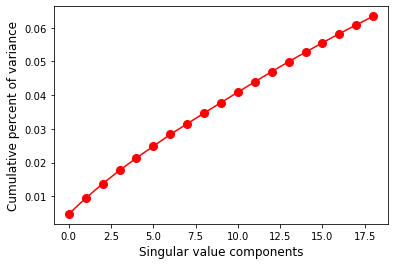

In [28]:
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms = 16, color='red')
plt.xlabel('Singular value components', fontsize= 12)
plt.ylabel('Cumulative percent of variance', fontsize=12)        
plt.show()

In [29]:
from sklearn.metrics.pairwise import cosine_similarity
# возьмем латентные векторы для выбранного фильма и из контентной матрицы, и из коллаборативной

latent_matrix_1_df = latent_matrix_1_df[~latent_matrix_1_df.index.duplicated(keep='first')]
latent_matrix_2_df = latent_matrix_2_df[~latent_matrix_2_df.index.duplicated(keep='first')]
a_1 = np.array(latent_matrix_1_df.loc['Toy Story (1995)']).reshape(1, -1)
a_2 = np.array(latent_matrix_2_df.loc["Toy Story (1995)"]).reshape(1, -1)

# рассчитаем схожесть этого фильма с другими
score_1 = cosine_similarity(latent_matrix_1_df, a_1).reshape(-1)
score_2 = cosine_similarity(latent_matrix_2_df, a_2).reshape(-1)
score_1 = score_1[:score_2.shape[0]]
# среднее между контентной и коллаборативной схожестью 
hybrid = ((score_2 + score_1)/2.0)

# сформируем датафрейм похожих фильмов
dictDf = {'content': score_1 , 'collaborative': score_2, 'hybrid': hybrid} 
# dictDf = {'collaborative': score_2} 
similar = pd.DataFrame(dictDf, index = latent_matrix_2_df.index )

# отсортируем его на основе: content, collaborative or hybrid, 
# здесь : content
similar.sort_values('content', ascending=False, inplace=True)

similar[1:].head(20)

,content,collaborative,hybrid
Contraband (2012),0.956031,-0.034132,0.460949
"Iron Giant, The (1999)",0.954143,0.038207,0.496175
Tron (1982),0.953258,0.982717,0.967988
"Prestige, The (2006)",0.952425,0.309153,0.630789
"Avengers, The (2012)",0.947319,0.696309,0.821814
Out of Sight (1998),0.945917,0.202834,0.574375
Restrepo (2010),0.943702,0.409222,0.676462
Down to You (2000),0.941719,0.498217,0.719968
Import/Export (2007),0.940620,-0.041699,0.449460
Taxi 2 (2000),0.938859,-0.335952,0.301454


In [30]:
similar.sort_values('collaborative', ascending=False, inplace=True)

similar[1:].head(20)

,content,collaborative,hybrid
On the Town (1949),3.759831e-01,0.986185,0.681084
Charade (1963),-8.372402e-07,0.985156,0.492578
Benny & Joon (1993),4.843117e-01,0.983178,0.733745
Field of Dreams (1989),1.607080e-01,0.982740,0.571724
St. Elmo's Fire (1985),4.093371e-01,0.982717,0.696027
It Might Get Loud (2008),5.633924e-01,0.982717,0.773055
Tron (1982),9.532579e-01,0.982717,0.967988
"Break-Up, The (2006)",-8.372402e-07,0.961848,0.480924
Steal This Movie! (2000),3.670995e-02,0.865307,0.451008
"Maria Full of Grace (Maria, Llena eres de gracia) (2004)",4.776019e-01,0.865307,0.671454


In [31]:
similar.sort_values('hybrid', ascending=False, inplace=True)

similar[1:].head(20)

,content,collaborative,hybrid
Driven (2001),0.860433,0.794606,0.827520
Toy Story (1995),0.648942,1.000000,0.824471
"Avengers, The (2012)",0.947319,0.696309,0.821814
"Rape of Europa, The (2006)",0.792841,0.807116,0.799979
Billy Madison (1995),0.892055,0.699706,0.795880
Close Encounters of the Third Kind (1977),0.844108,0.744455,0.794282
Scary Movie 2 (2001),0.781048,0.786450,0.783749
"Age of Innocence, The (1993)",0.760920,0.800511,0.780715
Kika (1993),0.815370,0.731694,0.773532
It Might Get Loud (2008),0.563392,0.982717,0.773055


#### SurPRiSE - Simple Python RecommendatIon System Engine

In [32]:
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split

In [33]:
reader = Reader()
data = Dataset.load_from_df(sub_rating[['userId', 'movieId', 'rating']], reader)

In [34]:
# train SVD on 75% of known rates
trainset, testset = train_test_split(data, test_size=.25)
algorithm = SVD()
algorithm.fit(trainset)
predictions = algorithm.test(testset)

# check the accuracy using Root Mean Square Error
accuracy.rmse(predictions)

RMSE: 1.0472


1.047164030211421

#### Гибридная модель

In [35]:
latent_matrix_1_df = latent_matrix_1_df[~latent_matrix_1_df.index.duplicated(keep='first')]
latent_matrix_2_df = latent_matrix_2_df[~latent_matrix_2_df.index.duplicated(keep='first')]

In [36]:
def hybrid_recommender(title):
    # COnsider both collaborative and content based filtering

    a_1 = np.array(latent_matrix_1_df.loc[title]).reshape(1, -1)
    a_2 = np.array(latent_matrix_2_df.loc[title]).reshape(1, -1)

    # calculate the similartity of this movie with the others in the list
    score_1 = cosine_similarity(latent_matrix_1_df, a_1).reshape(-1)
    score_2 = cosine_similarity(latent_matrix_2_df, a_2).reshape(-1)

    score_1 = score_1[:score_2.shape[0]]

    # an average measure of both content and collaborative 
    hybrid = ((score_1 + score_2)/2.0)

    # form a data frame of similar movies 
    dictDf = {'content': score_1 , 'collaborative': score_2, 'hybrid': hybrid} 
    similar = pd.DataFrame(dictDf, index = latent_matrix_2_df.index )

    #sort it on the basis of either: content, collaborative or hybrid
    similar.sort_values('hybrid', ascending=False, inplace=True)

    print(similar[1:].head(20))

In [37]:
hybrid_recommender('Titanic (1997)')

                                                   content  collaborative  \
Looking for Richard (1996)                        0.823362       0.729658   
Philadelphia Story, The (1940)                    0.838481       0.710468   
Mirror Mirror (2012)                              0.807062       0.722672   
Surrogates (2009)                                 0.873514       0.616714   
To the Devil a Daughter (1976)                    0.764492       0.722095   
Downfall (Untergang, Der) (2004)                  0.823452       0.659514   
Mutiny on the Bounty (1935)                       0.733128       0.730991   
X-Men: First Class (2011)                         0.719292       0.729166   
Strange Days (1995)                               0.851605       0.594585   
Bridges of Madison County, The (1995)             0.786700       0.645605   
Once Upon a Time in China (Wong Fei Hung) (1991)  0.787351       0.642837   
Spy Who Came in from the Cold, The (1965)         0.829991       0.594826   